## Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df_train = pd.read_csv('./sdd-hackaton-25-heart-risk/train.csv')
df_train.shape

(225000, 325)

In [3]:
X_train_all = df_train.drop(columns=['TARGET'])
X_train_all.shape

(225000, 324)

In [4]:
y_train_all = df_train['TARGET']
y_train_all.value_counts()

TARGET
False    204861
True      20139
Name: count, dtype: int64

## Feature analysis and filtering

/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_2859/855064119.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


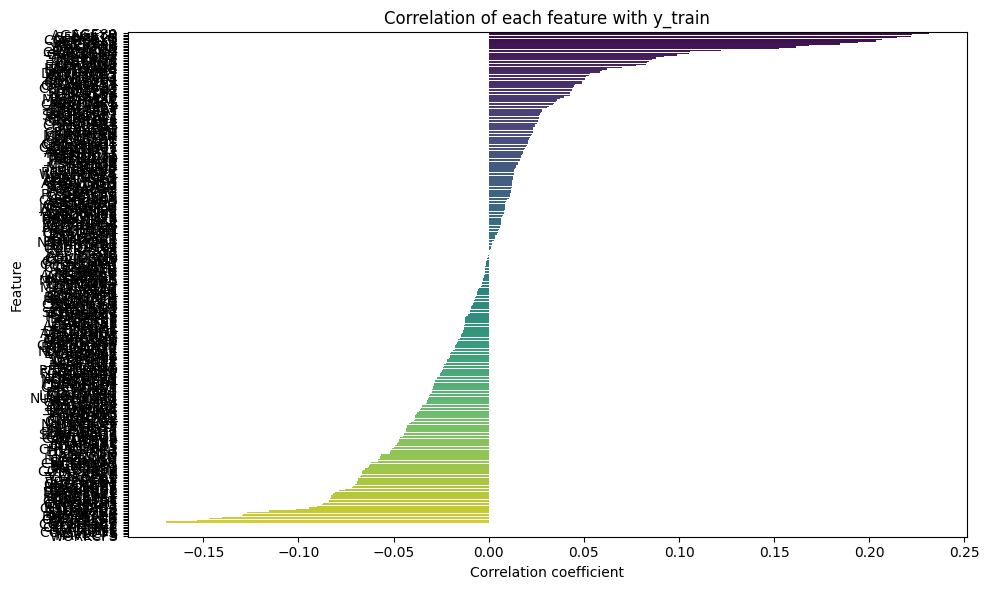

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# --- Correlation with y_train ---
corr_with_target = X_train_all.corrwith(y_train_all).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Correlation of each feature with y_train")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [6]:
# Select features with |correlation| > 0.10
selected_features = corr_with_target[abs(corr_with_target) > 0.10].sort_values(ascending=False)

print("Features with correlation magnitude > 0.10:\n")
print(selected_features)

Features with correlation magnitude > 0.10:

_AGE80      0.231371
_AGEG5YR    0.222521
GENHLTH     0.222041
_AGE_G      0.214506
COLGSEX1    0.206725
EMPLOY1     0.203364
_HCVU652    0.194126
_AGE65YR    0.184403
_PACKYRS    0.168462
_YRSSMOK    0.161509
_RFHLTH     0.152469
_PACKDAY    0.121894
CRVCLCNC    0.105677
CHILDREN    0.105020
QSTVER     -0.101399
_SMOKGRP   -0.115289
HAVARTH4   -0.126937
DIFFWALK   -0.129064
RMVTETH4   -0.129525
RESPSLCT   -0.139966
COPDBRTH   -0.146857
DIABETE4   -0.153138
_DRDXAR2   -0.169732
dtype: float64


In [7]:
X_selected = X_train_all[selected_features.index]
X_selected

,_AGE80,_AGEG5YR,GENHLTH,_AGE_G,COLGSEX1,EMPLOY1,_HCVU652,_AGE65YR,_PACKYRS,_YRSSMOK,...,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,DIFFWALK,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,_DRDXAR2
0,80.0,13.0,3.0,6.0,NaN,7.0,9.0,2.0,44.0,22.0,...,88.0,10.0,3.0,1.0,2.0,8.0,NaN,NaN,3.0,1.0
1,34.0,3.0,3.0,2.0,NaN,5.0,1.0,1.0,NaN,NaN,...,2.0,22.0,4.0,2.0,2.0,1.0,NaN,NaN,3.0,2.0
2,43.0,5.0,2.0,3.0,NaN,1.0,1.0,1.0,7.0,9.0,...,2.0,12.0,3.0,2.0,2.0,1.0,1.0,NaN,3.0,2.0
3,56.0,8.0,3.0,5.0,NaN,1.0,1.0,1.0,NaN,NaN,...,88.0,22.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0
4,22.0,1.0,3.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,88.0,20.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,72.0,11.0,3.0,6.0,NaN,7.0,9.0,2.0,56.0,56.0,...,88.0,20.0,2.0,1.0,2.0,8.0,NaN,NaN,3.0,1.0
224996,64.0,9.0,3.0,5.0,NaN,4.0,1.0,1.0,6.0,8.0,...,88.0,20.0,3.0,2.0,1.0,1.0,NaN,NaN,3.0,2.0
224997,50.0,7.0,3.0,4.0,NaN,1.0,1.0,1.0,NaN,NaN,...,3.0,20.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0
224998,59.0,8.0,1.0,5.0,NaN,1.0,1.0,1.0,NaN,NaN,...,88.0,21.0,4.0,1.0,2.0,7.0,NaN,NaN,3.0,1.0



Highly correlated feature pairs (|r| > 0.75):

_AGE80 - _AGEG5YR: 0.964
_AGE80 - _AGE_G: 0.974
_AGEG5YR - _AGE_G: 0.942
_AGEG5YR - _AGE65YR: 0.796
_HCVU652 - _AGE65YR: 0.916
_PACKYRS - _PACKDAY: 0.774
HAVARTH4 - _DRDXAR2: 1.000


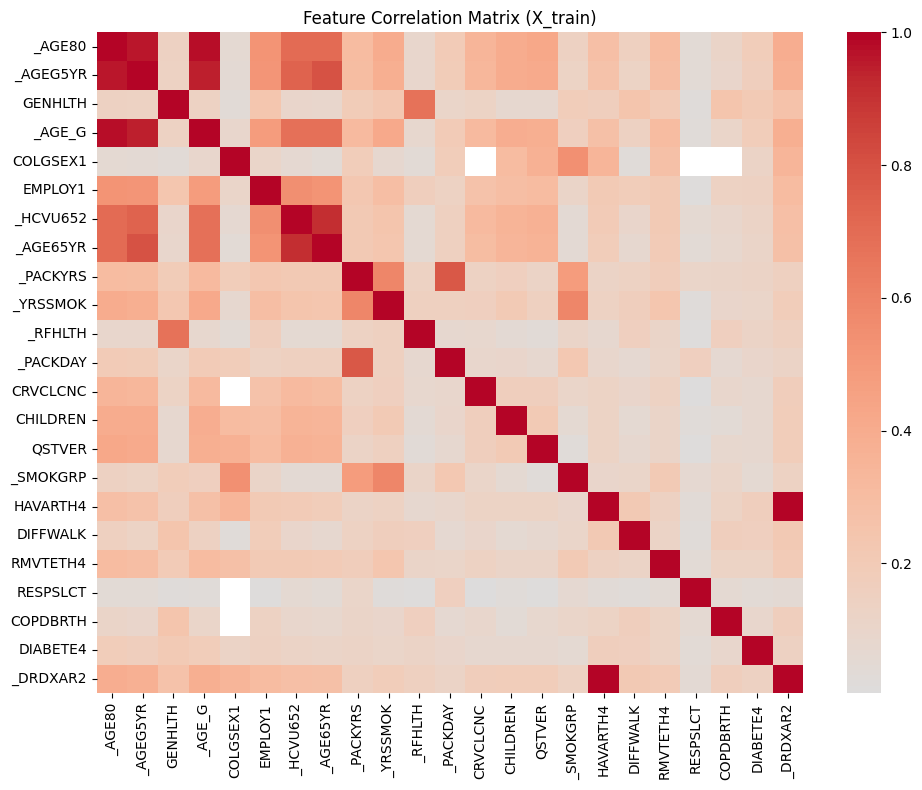

In [8]:
# --- Feature-to-feature correlations ---
corr_matrix = X_selected.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.75  # you can adjust this
high_corr_pairs = [
    (col1, col2, upper.loc[col1, col2])
    for col1 in upper.columns
    for col2 in upper.index
    if not pd.isna(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold
]

# Print the high correlation pairs
print(f"\nHighly correlated feature pairs (|r| > {threshold}):\n")
for col1, col2, corr_val in high_corr_pairs:
    print(f"{col1} - {col2}: {corr_val:.3f}")

# --- Optional heatmap for all correlations ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Matrix (X_train)")
plt.tight_layout()
plt.show()

In [9]:
# Keep only of highly inter-correlated features.
columns_to_drop = [
    'HAVARTH4',
    '_AGE80',
    '_AGE65YR',
    '_AGE_G',
    '_HCVU652',
    '_PACKYRS'
]

X_train_selected_dropped = X_selected.drop(columns=columns_to_drop)
X_train_selected_dropped

,_AGEG5YR,GENHLTH,COLGSEX1,EMPLOY1,_YRSSMOK,_RFHLTH,_PACKDAY,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,DIFFWALK,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,_DRDXAR2
0,13.0,3.0,NaN,7.0,22.0,1.0,2.00,NaN,88.0,10.0,3.0,2.0,8.0,NaN,NaN,3.0,1.0
1,3.0,3.0,NaN,5.0,NaN,1.0,NaN,5.0,2.0,22.0,4.0,2.0,1.0,NaN,NaN,3.0,2.0
2,5.0,2.0,NaN,1.0,9.0,1.0,0.75,NaN,2.0,12.0,3.0,2.0,1.0,1.0,NaN,3.0,2.0
3,8.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,88.0,22.0,4.0,2.0,8.0,NaN,NaN,3.0,2.0
4,1.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,88.0,20.0,4.0,2.0,8.0,NaN,NaN,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,11.0,3.0,NaN,7.0,56.0,1.0,1.00,NaN,88.0,20.0,2.0,2.0,8.0,NaN,NaN,3.0,1.0
224996,9.0,3.0,NaN,4.0,8.0,1.0,0.75,NaN,88.0,20.0,3.0,1.0,1.0,NaN,NaN,3.0,2.0
224997,7.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,3.0,20.0,4.0,2.0,8.0,NaN,NaN,3.0,2.0
224998,8.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,88.0,21.0,4.0,2.0,7.0,NaN,NaN,3.0,1.0


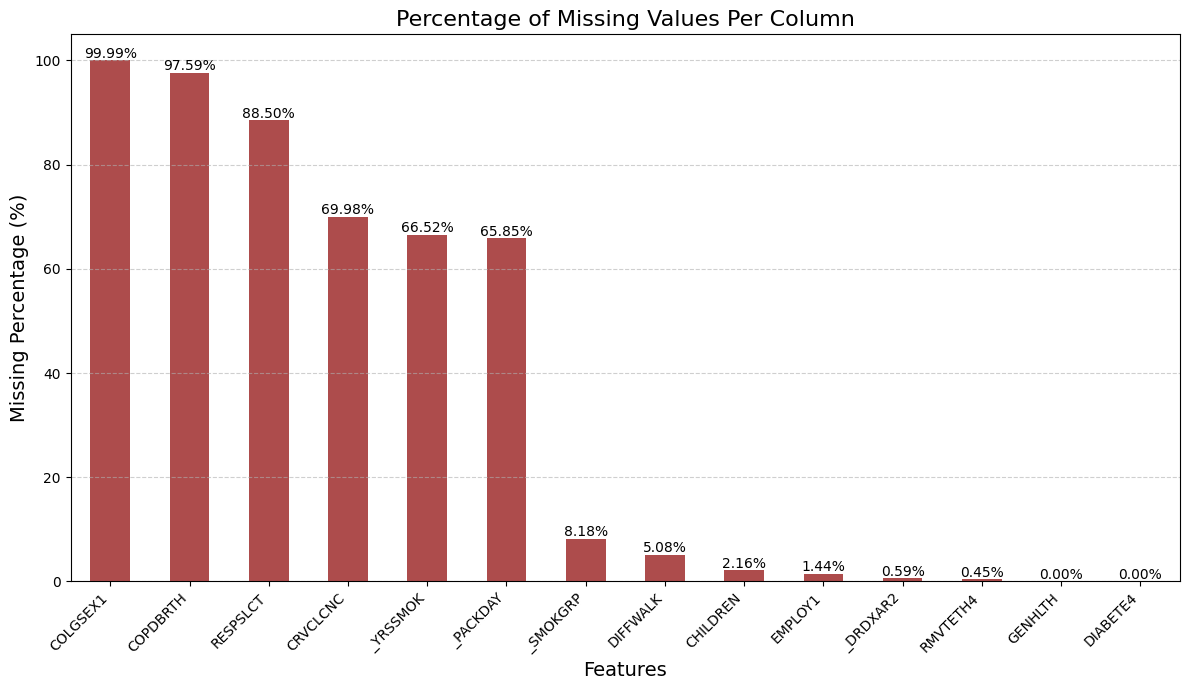

In [10]:
# Analyse des valeurs manquantes

data = X_train_selected_dropped

# 1. Calculate the percentage of missing values for every column
missing_percentage = data.isnull().sum() / len(data) * 100

# 2. Filter for columns with missing data and sort them in descending order
missing_data = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

if missing_data.empty:
    print("No missing values were detected in the DataFrame.")
else:
    # 3. Plotting the results
    plt.figure(figsize=(12, 7))
    
    # Create the bar chart
    missing_data.plot(kind='bar', color='darkred', alpha=0.7)
    
    # Add percentage labels on top of the bars for precision
    for i, percentage in enumerate(missing_data.values):
        # Adjust vertical position of text for clarity
        plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', fontsize=10)
    
    # Set plot aesthetics
    plt.title('Percentage of Missing Values Per Column', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Missing Percentage (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [11]:
# Define the missingness threshold (n%)
N_THRESHOLD = 50

# 1. Calculate the percentage of missing values per column
missing_percentage = data.isnull().sum() / len(X_train_selected_dropped) * 100

# 2. Identify columns that exceed the threshold
#    These are the columns to be dropped
columns_to_drop = missing_percentage[missing_percentage > N_THRESHOLD].index.tolist()

if not columns_to_drop:
    print(f"No columns in X_train exceeded the {N_THRESHOLD}% missing value threshold.")
else:
    # 3. Drop the identified columns from the DataFrame
    X_train_filtered = data.drop(columns=columns_to_drop)
    
    # Report the action taken
    print(f"The following columns were dropped because they exceeded the {N_THRESHOLD}% missing value threshold:")
    print(columns_to_drop)
    print(f"\nNew X_train shape: {X_train_filtered.shape}")
    
    # Replace the original DataFrame (optional, but common practice)
    # X_train = X_train_clean

The following columns were dropped because they exceeded the 50% missing value threshold:
['COLGSEX1', '_YRSSMOK', '_PACKDAY', 'CRVCLCNC', 'RESPSLCT', 'COPDBRTH']

New X_train shape: (225000, 11)


In [12]:
final_columns = X_train_filtered.columns
final_columns

Index(['_AGEG5YR', 'GENHLTH', 'EMPLOY1', '_RFHLTH', 'CHILDREN', 'QSTVER',
       '_SMOKGRP', 'DIFFWALK', 'RMVTETH4', 'DIABETE4', '_DRDXAR2'],
      dtype='object')

In [ ]:
# final_columns = [
#     '_AGEG5YR',
#     '_BMI5',
#     '_SMOKGRP'
# ]

In [14]:
X_train_all_final = X_train_all[final_columns]

In [15]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Step 1: Standardize features (important for PCA)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_filtered)

# # Step 2: Fit PCA
# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X_scaled)

# # Step 3: Plot colored by target
# plt.figure(figsize=(8,6))
# scatter = plt.scatter(
#     X_pca[:, 0], X_pca[:, 1],
#     c=y_train_all,               # color by target
#     cmap='viridis',          # color map
#     alpha=0.7
# )

# plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
# plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
# plt.title("PCA: First 2 Principal Components (colored by target)")
# plt.colorbar(scatter, label='Target')
# plt.grid(True)
# plt.show()

# # Step 4: Print explained variance
# print("Explained variance ratio per component:", pca.explained_variance_ratio_)
# print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

## Model conception

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Train test split

In [17]:
# X: features, y: target
X_train, X_test, y_train, y_test = train_test_split(
    X_train_all_final, y_train_all,
    test_size=0.2,        # 20% test, 80% train
    random_state=42,      # for reproducibility
    shuffle=True          # shuffle before splitting
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (180000, 3)
Test size: (45000, 3)


### Methods to impute missing values

In [18]:
def simple_impute(df, strategy='mean'):

    simple_imputer = SimpleImputer(strategy=strategy)

    # Fit on X_train_sorted and transform
    df_imputed = simple_imputer.fit_transform(df)

    # Convert back to DataFrame
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

    return df_imputed, simple_imputer

In [19]:
X_train_imputed, simple_imputer = simple_impute(X_train)
X_train_imputed

,_AGEG5YR,_BMI5,_SMOKGRP
0,7.0,2813.000000,4.000000
1,9.0,2848.359468,3.000000
2,10.0,2480.000000,2.000000
3,12.0,2555.000000,4.000000
4,8.0,2375.000000,3.000000
...,...,...,...
179995,9.0,2848.359468,3.448611
179996,4.0,3517.000000,4.000000
179997,13.0,4297.000000,4.000000
179998,10.0,2834.000000,1.000000


### Resampling to account for class imbalance

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imputed, y_train)

### Define ML models

In [ ]:
# model = xgb.XGBClassifier(
#     random_state=42
# )

model = RandomForestClassifier(
    # class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [23]:
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_train_sm)
f1 = f1_score(y_train_sm, y_pred)
print('F1 score on train:', f1)

y_pred = model.predict(simple_imputer.transform(X_test))
f1 = f1_score(y_test, y_pred)
print('F1 score on test', f1)

F1 score on train: 0.8935323022904356


/home/mqtho/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


F1 score on test 0.21526594313391337


In [24]:
# Random Forest

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None]
}

estimator = RandomForestClassifier(
    # class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


# # XGBoost
# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6, 8],
#     'min_child_weight': [1, 3, 5, 7],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'reg_lambda': [1, 2, 5, 10],
#     'reg_alpha': [0, 0.1, 0.5, 1],
# }


# estimator = xgb.XGBClassifier(
#     random_state=42
# )

In [91]:
# # Grid search with 5-fold CV
# grid_search = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1', # or another metric
#     verbose=3
# )

# # Fit
# grid_search.fit(X_train_sm, y_train_sm)


# # Best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best CV score:", grid_search.best_score_)

# best_model = grid_search.best_estimator_

# Random search with 5-fold CV
search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_sm, y_train_sm)
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

best_model = search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mqtho/miniconda3/envs/myenv/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/mqtho/miniconda3/envs/myenv/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/home/mqtho/miniconda3/envs/myenv/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using 

[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=10, subsample=0.9;, score=0.823 total time=   3.5s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=10, subsample=0.9;, score=0.825 total time=   3.4s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=10, subsample=0.9;, score=0.822 total time=   3.5s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=10, subsample=0.9;, score=0.731 total time=   5.9s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=10, subsample=0.9;, score=0.822 total time=   6.5s
[CV 1/5] END colsample_bytree=

In [93]:
model = best_model

model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_train_sm)
f1 = f1_score(y_train_sm, y_pred)
print('F1 score on train:', f1)

y_pred = model.predict(simple_imputer.transform(X_test))
f1 = f1_score(y_test, y_pred)
print('F1 score on test', f1)

F1 score on train: 0.8203260341239079
F1 score on test 0.2591882656888074


## Prediction on test for submission

In [94]:
# Retraining with best parameters on X_train_all_final
X_train_all_final_imputed, simple_imputer = simple_impute(X_train_all_final)
X_train_all_final_imputed

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_all_final_imputed, y_train_all)

estimator = best_model

estimator.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_train_sm)
f1 = f1_score(y_train_sm, y_pred)
print('F1 score on train:', f1)

F1 score on train: 0.8052953510589461


In [70]:
# XX_test = pd.read_csv('./sdd-hackaton-25-heart-risk/test.csv')
# XX_test

In [95]:
# Impute missing values in test
XX_test_imputed = simple_imputer.transform(XX_test[final_columns])
# Convert back to DataFrame
XX_test_imputed = pd.DataFrame(XX_test_imputed, columns=final_columns)

predictions = estimator.predict(XX_test_imputed).astype(int)

# submission
XX_test['TARGET'] = predictions

df_submission = XX_test[['ID', 'TARGET']]

df_submission

,ID,TARGET
0,225000,0
1,225001,0
2,225002,0
3,225003,0
4,225004,1
...,...,...
74995,299995,0
74996,299996,0
74997,299997,0
74998,299998,1


In [96]:
df_submission.to_csv('submission.csv', index=False)